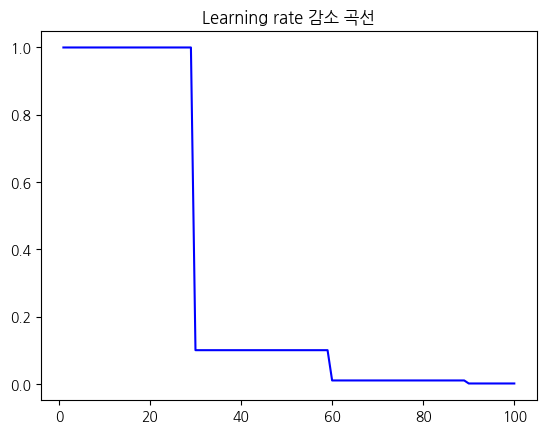

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

def lr_schedule():
    lr_list = []
    lr = 1
    for i in range(1,101):
        if i % 30 ==0:
            lr = 0.1 * lr
            lr_list.append(lr)
        else:
            lr_list.append(lr)
    return lr_list

step = [i for i in range(1,101)]
lr = lr_schedule()
plt.plot(step, lr, 'b')
plt.title('Learning rate 감소 곡선')
plt.show()

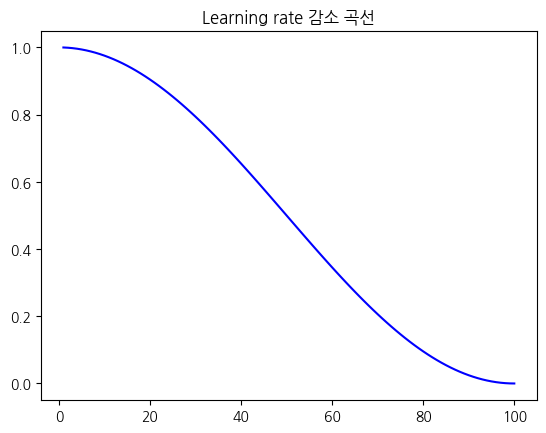

In [2]:
def cosine_decay():
    lr_init = 1
    lr_list = []
    total_epochs = 100
    lr = 0
    for i in range(1, total_epochs+1):
        lr = 0.5 * lr_init * (1 + np.cos((i*np.pi)/total_epochs))
        lr_list.append(lr)
    return lr_list

x = [i for i in range(1, 101)]
y = cosine_decay()
plt.plot(x, y, 'b')
plt.title('Learning rate 감소 곡선')
plt.show()


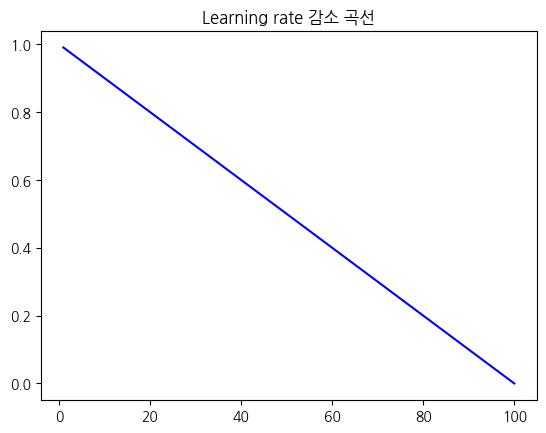

In [3]:
def linear_decay():
    lr_init = 1
    lr_list = []
    total_epochs = 100
    lr_t = 0
    for i in range(1, total_epochs+1):
        lr = lr_init * (1 - i / total_epochs)
        lr_list.append(lr)
    return lr_list

x = [i for i in range(1, 101)]
y = linear_decay()
plt.plot(x, y, 'b')
plt.title('Learning rate 감소 곡선')
plt.show()


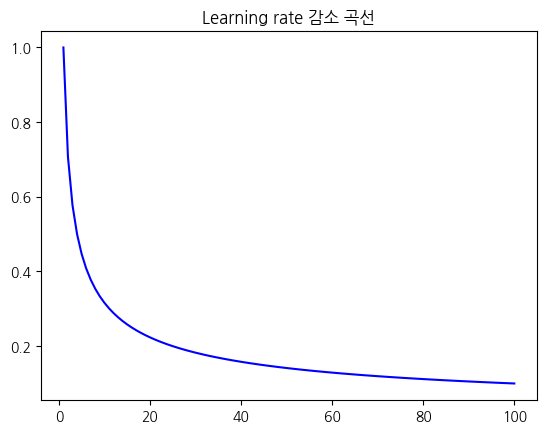

In [4]:
def linear_decay():
    lr_init = 1
    lr_list = []
    total_epochs = 100
    lr_t = 0
    for i in range(1, total_epochs+1):
        lr = lr_init / (np.sqrt(i))
        lr_list.append(lr)
    return lr_list

x = [i for i in range(1, 101)]
y = linear_decay()
plt.plot(x, y, 'b')
plt.title('Learning rate 감소 곡선')
plt.show()

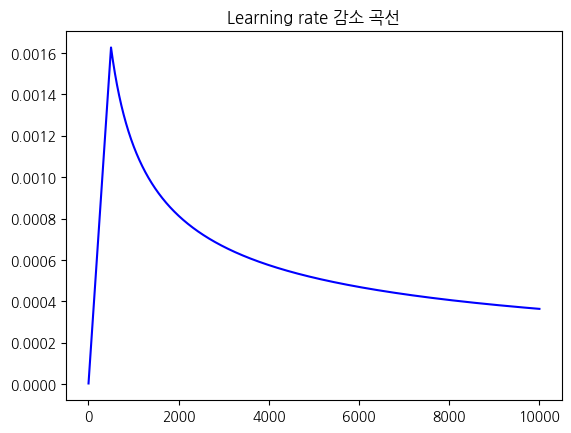

In [5]:
def warmup_decay():
    warmup_step = 500
    lr_list = []
    lr = 0
    for i in range(1, 10001):
        lr = 756**(-0.5) * min(i**(-0.5), i * (warmup_step**(-1.5)))
        lr_list.append(lr)
    return lr_list

x = [i for i in range(1, 10001)]
y = warmup_decay()
plt.plot(x, y, 'b')
plt.title('Learning rate 감소 곡선')
plt.show() 

## Learning Rate Scheduler 사용해보기

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.optimizers import SGD, Adagrad, Adam, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler

import tensorflow as tf

data_path = 'C:/Users/Myeong/dding/data/train_10000_mk2.csv'
data = pd.read_csv(data_path)
data

,non_label_sentence,label_sentence,class,binary_class
0,해병대는 자기가 지원해서 가는 거잖아\n응응 시험 같은 것도 있지 않아\n어떻게 해...,1:해병대는 자기가 지원해서 가는 거잖아\n2:응응 시험 같은 것도 있지 않아\n1...,일반 대화,일반 대화
1,오늘 서울은 하루종일 꾸물하다 날씨가\n요즘 날씨가 계속 꾸물하고 비오고\n언제 선...,1:오늘 서울은 하루종일 꾸물하다 날씨가\n2:요즘 날씨가 계속 꾸물하고 비오고\n...,일반 대화,일반 대화
2,남자들은 전립선 비대증이 큰일이에요\n진작에 관리 안 한 걸 후회한다\n치료도 잘 ...,1:남자들은 전립선 비대증이 큰일이에요\n2:진작에 관리 안 한 걸 후회한다\n1:...,일반 대화,일반 대화
3,안녕\n나는 이 날씨에 서핑하러 간다\n와 이제 곧 겨울인데 서핑을 해\n당연히 제...,1:안녕\n1:나는 이 날씨에 서핑하러 간다\n2:와 이제 곧 겨울인데 서핑을 해\...,일반 대화,일반 대화
4,넌 몇살에 결혼 하고 싶어\n35살 난 최대한 즐기고 결혼 할 거야\n그럼 애기는 ...,1:넌 몇살에 결혼 하고 싶어\n2:35살 난 최대한 즐기고 결혼 할 거야\n1:그...,일반 대화,일반 대화
...,...,...,...,...
13865,준하야 넌 대가리가 왜 이렇게 크냐\n내 머리가 뭐\n밥 먹으면 대가리만 크냐 너는...,1:준하야 넌 대가리가 왜이렇게 크냐\n2:내 머리가 뭐\n1:밥먹으면 대가리만 크...,기타 괴롭힘 대화,공격 대화
13866,내가 지금 너 아들 김길준 데리고 있어 살리고 싶으면 계좌에 1억만 보내\n예 ...,1:내가 지금 너 아들 김길준 데리고 있어 살리고 싶으면 계좌에 1억만 보내\n2...,갈취 대화,공격 대화
13867,나는 씨 같은 사람 보면 참 신기하더라 어떻게 저렇게 살지\n왜 그래 들리겠어\...,1:나는 씨 같은 사람 보면 참 신기하더라 어떻게 저렇게 살지\n1:왜 그래 들...,직장 내 괴롭힘 대화,공격 대화
13868,누구 맘대로 여기서 장사하래\n이게 무슨 일입니까\n남의 구역에서 장사하려면 자릿세...,1:누구맘대로 여기서 장사하래\n2:이게 무슨일입니까\n1:남의 구역에서 장사하려면...,갈취 대화,공격 대화


In [7]:
sentences = data.non_label_sentence
sentences = [sen for sen in sentences]

from soynlp.tokenizer import LTokenizer
from soynlp.word import WordExtractor

word_extractor = WordExtractor(
    min_frequency=100, # example
    min_cohesion_forward=0.05,
    min_right_branching_entropy=0.0
)

word_extractor.train(sentences)
words = word_extractor.extract()

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

training was done. used memory 0.598 Gbory 0.380 Gb
all cohesion probabilities was computed. # words = 2803
all branching entropies was computed # words = 58000
all accessor variety was computed # words = 58000


In [8]:
data['tokenized'] = data['non_label_sentence'].apply(tokenizer.tokenize)

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

conversation = data['tokenized'].values

tokenizer_tf = Tokenizer()
tokenizer_tf.fit_on_texts(conversation)
len(tokenizer_tf.word_index)

126458

In [10]:
vocab_size = 30000
tokenizer_tf = Tokenizer(num_words=vocab_size) 
tokenizer_tf.fit_on_texts(conversation)
X_data = tokenizer_tf.texts_to_sequences(conversation)

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded = pad_sequences(X_data)
print(padded.shape)

(13870, 195)


In [12]:
labels = {'협박 대화':0, '갈취 대화':1, '직장 내 괴롭힘 대화':2, '기타 괴롭힘 대화':3, '일반 대화':4}

train_label = data['class']
train_label = train_label.apply(lambda x: labels[x])
train_label

0        4
1        4
2        4
3        4
4        4
        ..
13865    3
13866    1
13867    2
13868    1
13869    2
Name: class, Length: 13870, dtype: int64

In [13]:
train_data = padded
# train_label = data['class']
# labels = {'협박 대화':0, '갈취 대화':1, '직장 내 괴롭힘 대화':2, '기타 괴롭힘 대화':3, '일반 대화':4}

# train_label = train_label.apply(lambda x: labels[x])
# train_label = pd.get_dummies(train_label).to_numpy(dtype=np.int32)
# print(train_label)

In [14]:
from sklearn.model_selection import train_test_split
train_data = padded

train_X, test_X, train_Y, test_Y = train_test_split(train_data, train_label, test_size=0.4, random_state=22, stratify=train_label)
valid_X, test_X, valid_Y, test_Y = train_test_split(test_X, test_Y, test_size=0.5, random_state=22, stratify=test_Y)

print(len(train_X), len(valid_X), len(test_X))
print(len(train_Y), len(valid_Y), len(test_Y))

8322 2774 2774
8322 2774 2774


In [16]:
embedding_dim = 256
hidden_units = 64
label_size = len(labels)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(hidden_units, return_sequences=True))
model.add(tf.keras.layers.LSTM(hidden_units//2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(label_size))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         7680000   
                                                                 
 lstm (LSTM)                 (None, None, 64)          82176     
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          33024     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 6

## 손실함수와 최적화함수 구현

In [17]:
# step_decay
def step_decay(epoch):
    lr_init = 0.05
    drop = 0.5
    epochs_drop = 30
    lr = lr_init * (drop ** (np.floor(epoch/epochs_drop)))
    return lr

cosine_decay = tf.keras.experimental.CosineDecay(initial_learning_rate=0.01, decay_steps=30, alpha=0.001)

In [19]:
cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [20]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)

        loss_value = cce(y, logits)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    train_acc_metric.update_state(y, logits)
    return loss_value 

@tf.function
def test_step(x, y):
    val_logits = model(x, training=False)
    val_loss = cce(y, val_logits)
    val_acc_metric.update_state(y, val_logits)
    return val_loss


In [21]:
# batch_size = 64

# train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_Y))
# train_dataset = train_dataset.batch(batch_size, drop_remainder=True)

# val_dataset = tf.data.Dataset.from_tensor_slices((valid_X, valid_Y))
# val_dataset = val_dataset.batch(batch_size, drop_remainder=True)

# epochs=10
# history = {'loss':[], 'val_loss':[], 'acc':[], 'val_acc':[]}
# for epoch in range(epochs):
#     print("\nStart of epoch %d" % (epoch+1))

#     for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
#         loss_value = train_step(x_batch_train, y_batch_train)
#         history['loss'].append(loss_value.numpy())

#         # 20 step 마다 결과 출력
#         if step % 20 == 0:
#             print(
#                 "Training loss (for one batch) at step %d: %.4f"
#                 %(step, float(loss_value))
#             )
#             print('Seen so far: %d samples'% ((step+1)*batch_size))
        
#     train_acc = train_acc_metric.result()
#     history['acc'].append(train_acc.numpy())
#     print('Training acc over epoch: %.4f'% (float(train_acc),))

#     # 에폭마다 훈련 accuracy metric 초기화
#     train_acc_metric.reset_states()

#     # Run a validation loop at the end of each epoch
#     for x_batch_val, y_batch_val in val_dataset:
#         val_loss_value = test_step(x_batch_val, y_batch_val)
#         history['val_loss'].append(val_loss_value.numpy())

#     val_acc = val_acc_metric.result()
#     history['val_acc'].append(val_acc.numpy())

#     val_acc_metric.reset_states()
#     print('Validation acc: %.4f'% (float(val_acc),))
    

In [22]:
batch_size = 64
val_batch_size = int(batch_size * (len(valid_X) / len(train_X)))
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_Y))
train_dataset = train_dataset.batch(batch_size, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((valid_X, valid_Y))
val_dataset = val_dataset.batch(val_batch_size, drop_remainder=True)

epochs=10
history = {'loss':[], 'val_loss':[], 'acc':[], 'val_acc':[]}

for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch+1))

    for step, ((x_batch_train, y_batch_train), (x_batch_val, y_batch_val)) in enumerate(zip(train_dataset, val_dataset)):
        loss_value = train_step(x_batch_train, y_batch_train)
        val_loss_value = test_step(x_batch_val, y_batch_val)

        history['loss'].append(loss_value.numpy())
        history['val_loss'].append(val_loss_value.numpy())

        # 20 step 마다 결과 출력
        if step % 20 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                %(step, float(loss_value))
            )
            print('Seen so far: %d train samples'% ((step+1)*batch_size))
        
    train_acc = train_acc_metric.result()
    val_acc = val_acc_metric.result()

    history['acc'].append(train_acc.numpy())
    history['val_acc'].append(val_acc.numpy())
    print('Training acc over epoch: %.4f'% (float(train_acc)))
    print('Validation acc: %.4f'% (float(val_acc)))

    # 에폭마다 훈련 accuracy metric 초기화
    train_acc_metric.reset_states()
    val_acc_metric.reset_states()


Start of epoch 1
Training loss (for one batch) at step 0: 1.6095
Seen so far: 64 train samples
Training loss (for one batch) at step 20: 1.1594
Seen so far: 1344 train samples
Training loss (for one batch) at step 40: 0.9417
Seen so far: 2624 train samples
Training loss (for one batch) at step 60: 0.6054
Seen so far: 3904 train samples
Training loss (for one batch) at step 80: 0.6232
Seen so far: 5184 train samples
Training loss (for one batch) at step 100: 0.5448
Seen so far: 6464 train samples
Training loss (for one batch) at step 120: 0.4763
Seen so far: 7744 train samples
Training acc over epoch: 0.7525
Validation acc: 0.7505

Start of epoch 2
Training loss (for one batch) at step 0: 0.4860
Seen so far: 64 train samples
Training loss (for one batch) at step 20: 0.5098
Seen so far: 1344 train samples
Training loss (for one batch) at step 40: 0.4299
Seen so far: 2624 train samples
Training loss (for one batch) at step 60: 0.4856
Seen so far: 3904 train samples
Training loss (for one

## Loss값 시각화 해보기

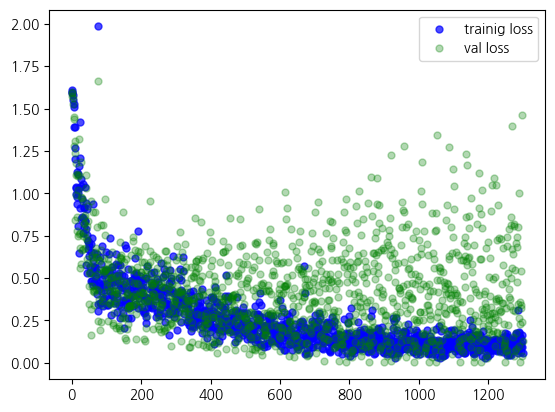

In [45]:
tr_range = list(range(len(history['loss'])))
plt.scatter(tr_range, history['loss'], s=5**2, c='b', alpha=0.7)
plt.scatter(tr_range, history['val_loss'], s=5**2, c='g', alpha=0.3)
plt.legend(['trainig loss', 'val loss'])
plt.show()


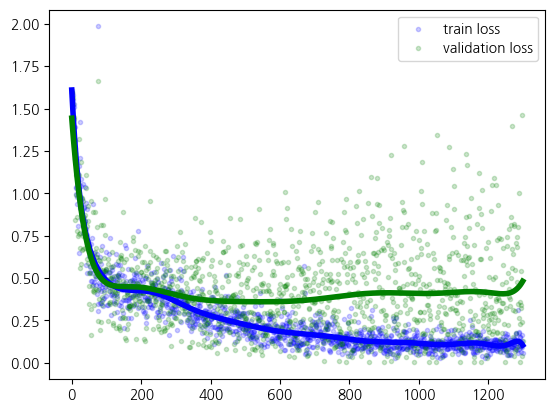

In [76]:
fig, ax = plt.subplots()
_ = ax.scatter(tr_range, history['loss'], s=3**2, c='b', alpha=0.2)
_ = ax.scatter(tr_range, history['val_loss'], s=3**2, c='g', alpha=0.2)

t_d = np.polyfit(tr_range, history['loss'], 15)
t_p = np.poly1d(t_d)
plt.plot(tr_range, t_p(tr_range), 'b', linewidth=4)

v_d = np.polyfit(tr_range, history['val_loss'], 10)
v_p = np.poly1d(v_d)
plt.plot(tr_range, v_p(tr_range), 'g', linewidth=4)
plt.legend(['train loss', 'validation loss'])
plt.show()

### 1. Learning Rate Decay 방식에 따른 성능 비교

런타임 재시작

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.optimizers import SGD, Adagrad, Adam, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from soynlp.tokenizer import LTokenizer
from soynlp.word import WordExtractor
import tensorflow as tf

# 데이터 불러오기
data_path = 'C:/Users/Myeong/dding/data/train_1000_mk2.csv'
data = pd.read_csv(data_path)

# SOYNLP 토크나이저 학습
sentences = data.non_label_sentence
sentences = [sen for sen in sentences]

word_extractor = WordExtractor(
    min_frequency=100, # example
    min_cohesion_forward=0.05,
    min_right_branching_entropy=0.0
)

word_extractor.train(sentences)
words = word_extractor.extract()

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

# 토큰화
data['tokenized'] = data['non_label_sentence'].apply(tokenizer.tokenize)

conversation = data['tokenized'].values

# 토큰화 된 문장 정수 인코딩 진행
tokenizer_tf = Tokenizer()
tokenizer_tf.fit_on_texts(conversation)

vocab_size = 30000
tokenizer_tf = Tokenizer(num_words=vocab_size) 
tokenizer_tf.fit_on_texts(conversation)
X_data = tokenizer_tf.texts_to_sequences(conversation)

# 패딩 진행
padded = pad_sequences(X_data)
train_data = padded

# 라벨 인코딩
labels = {'협박 대화':0, '갈취 대화':1, '직장 내 괴롭힘 대화':2, '기타 괴롭힘 대화':3, '일반 대화':4}

train_label = data['class']
train_label = train_label.apply(lambda x: labels[x])

# 데이터 나누기
train_X, test_X, train_Y, test_Y = train_test_split(train_data, train_label, test_size=0.4, random_state=22, stratify=train_label)
valid_X, test_X, valid_Y, test_Y = train_test_split(test_X, test_Y, test_size=0.5, random_state=22, stratify=test_Y)

training was done. used memory 0.433 Gbry 0.358 Gb
all cohesion probabilities was computed. # words = 868
all branching entropies was computed # words = 23278
all accessor variety was computed # words = 23278


In [2]:
# 모델 생성

# embedding_dim = 128
# hidden_units = 64
# label_size = len(labels)

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(None,)))
# model.add(tf.keras.layers.LSTM(hidden_units, return_sequences=True))
# # model.add(tf.keras.layers.LSTM(hidden_units, return_sequences=True))
# model.add(tf.keras.layers.LSTM(hidden_units//2))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(label_size))

# model.summary()

embedding_dim = 128
hidden_units = 64
label_size = len(labels)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(hidden_units, kernel_regularizer='l2', recurrent_dropout=0.3, return_sequences=True))
model.add(tf.keras.layers.LSTM(hidden_units, kernel_regularizer='l2', recurrent_dropout=0.3))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(label_size))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         3840000   
                                                                 
 lstm (LSTM)                 (None, None, 64)          49408     
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          33024     
                                                                 
 dense (Dense)               (None, None, 32)          2080      
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 dense_1 (Dense)             (None, None, 5)           165       
                                                                 
Total params: 3,924,677
Trainable params: 3,924,677
Non-

In [3]:
# 손실, 최적화 함수, 훈련, 검증 함수 정의

cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(2e-4)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = cce(y, logits)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    train_acc_metric.update_state(y, logits)

    return loss_value 

@tf.function
def test_step(x, y):
    val_logits = model(x, training=False)
    val_loss = cce(y, val_logits)
    val_acc_metric.update_state(y, val_logits)
    
    return val_loss

In [4]:
# 적용할 Learning rate decay 함수

def step_decay(epoch):
    lr_init = 0.1
    drop = 0.5
    epochs_drop = 10
    lr = lr_init * (drop ** (np.floor(epoch/epochs_drop)))
    return lr

def cosine_decay(epoch, epochs):
    lr_init = 0.1
    lr = (1/2)*lr_init*(1+np.cos(epoch*np.pi/epochs))
    return lr

def linear_decay(epoch, epochs):
    lr_init = 0.1
    lr = lr_init * ( 1 - (epoch/epochs))
    return lr

def inv_sqrt_decay(epoch):
    lr_init = 0.1
    lr = lr_init / np.sqrt(epoch)
    return lr


d_model = 256
class LinearWarmup(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=2000):
        super(LinearWarmup, self).__init__()
        
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)


In [5]:
# 훈련 시작
from tqdm import tqdm

batch_size = 64
val_batch_size = int(batch_size * (len(valid_X) / len(train_X)))
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_Y))
train_dataset = train_dataset.batch(batch_size, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((valid_X, valid_Y))
val_dataset = val_dataset.batch(val_batch_size, drop_remainder=True)

epochs=50
history = {'loss':[], 'val_loss':[], 'acc':[], 'val_acc':[]}

min_val_loss = 999
val_monitor = 0
for epoch in range(1, epochs+1):
    print("\nStart of epoch %d" % (epoch))
    # 학습률 감소 함수 적용
    # learning_rate = linear_decay(epoch, epochs)
    # tf.keras.backend.set_value(optimizer.lr, learning_rate)
    # print('현재 적용 학습률 :', tf.keras.backend.get_value(optimizer.lr))

    t = tqdm(zip(train_dataset, val_dataset))
    for step, ((x_batch_train, y_batch_train), (x_batch_val, y_batch_val)) in enumerate(t):
        loss_value = train_step(x_batch_train, y_batch_train)
        val_loss_value = test_step(x_batch_val, y_batch_val)
        
        if step % 20 == 0:
            history['loss'].append(loss_value.numpy())
            history['val_loss'].append(val_loss_value.numpy())

        t.set_description_str('Epoch %2d' % (epoch))
        t.set_postfix_str('Loss %.4f' % (loss_value))
    
    # validation loss에 변화가 없고 오히려 증가한다면 조기종료
    if val_loss_value <= min_val_loss:
        min_val_loss = val_loss_value
    elif val_loss_value > min_val_loss:
        val_monitor += 1

    if val_monitor >= 10:
        history['acc'].append(train_acc.numpy())
        history['val_acc'].append(val_acc.numpy())
        print('Training acc over epoch: %.4f'% (float(train_acc)))
        print('Validation acc: %.4f'% (float(val_acc)))
        print('Early Stopped')
        break
    
    train_acc = train_acc_metric.result()
    val_acc = val_acc_metric.result()

    history['acc'].append(train_acc.numpy())
    history['val_acc'].append(val_acc.numpy())
    print('Training acc over epoch: %.4f'% (float(train_acc)))
    print('Validation acc: %.4f'% (float(val_acc)))

    # 에폭마다 훈련 accuracy metric 초기화
    train_acc_metric.reset_states()
    val_acc_metric.reset_states()


Start of epoch 1


0it [00:00, ?it/s]


ValueError: in user code:

    File "C:\Users\Myeong\AppData\Local\Temp\ipykernel_12708\1546456652.py", line 12, in train_step  *
        loss_value = cce(y, logits)
    File "c:\Users\Myeong\anaconda3\envs\jin\lib\site-packages\keras\losses.py", line 139, in __call__  **
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Myeong\anaconda3\envs\jin\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Myeong\anaconda3\envs\jin\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "c:\Users\Myeong\anaconda3\envs\jin\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(64,) and logits.shape=(12224, 5)


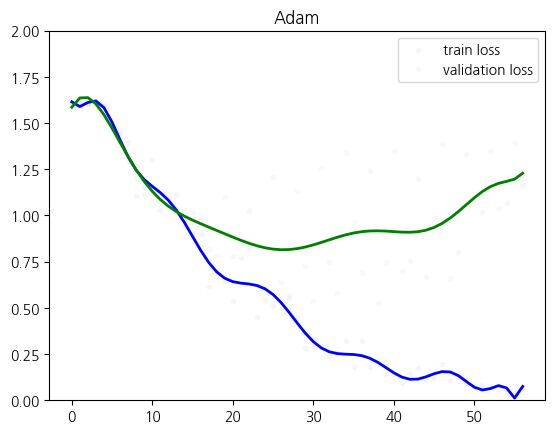

In [ ]:
# loss 시각화
tr_range = list(range(len(history['loss'])))

fig, ax = plt.subplots()
_ = ax.scatter(tr_range, history['loss'], s=3**2, c='b', alpha=0.03)
_ = ax.scatter(tr_range, history['val_loss'], s=3**2, c='g', alpha=0.03)

t_d = np.polyfit(tr_range, history['loss'], 15)
t_p = np.poly1d(t_d)
plt.plot(tr_range, t_p(tr_range), 'b', linewidth=2)

v_d = np.polyfit(tr_range, history['val_loss'], 10)
v_p = np.poly1d(v_d)
plt.plot(tr_range, v_p(tr_range), 'g', linewidth=2)
plt.title('Adam')
plt.ylim([0,2])
plt.legend(['train loss', 'validation loss'])
plt.show()

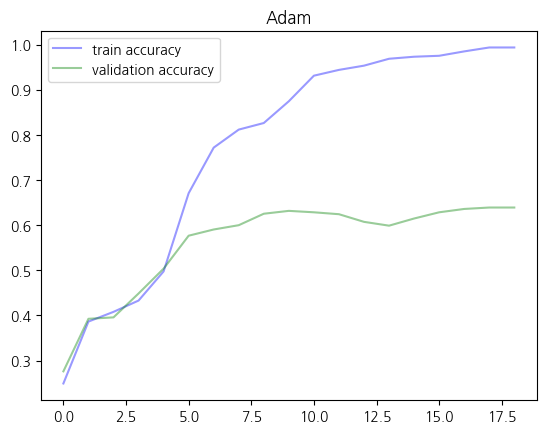

In [ ]:
# loss 시각화
tr_range = list(range(len(history['acc'])))

fig, ax = plt.subplots()
_ = ax.plot(tr_range, history['acc'], c='b', alpha=0.4)
_ = ax.plot(tr_range, history['val_acc'], c='g', alpha=0.4)

plt.title('Adam')
plt.legend(['train accuracy', 'validation accuracy'])
plt.show()

## Optimizer 구현해보기

1. Gradient Descent